In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import the data
data=pd.read_csv('Mall_Customers.csv')
data.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
# Aim to classify customers into groups based on their spending 

In [7]:
#using annual income and spending score as the categorization criteria
X=data.iloc[:, [3,4]].values

Text(0,0.5,'euclidean distance')

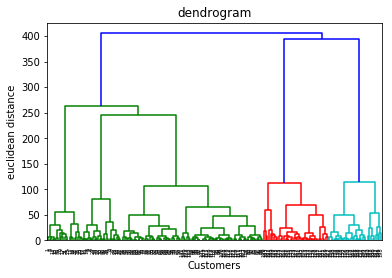

In [11]:
#use dendograms to identify the optimal number of clusters in HC
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('dendrogram')
plt.xlabel('Customers')
plt.ylabel('euclidean distance')

In [16]:
#we obtain 5 as the optimal number of clusters based on the dendrogram
#now fit HC to the data using agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
AC= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_cluster= AC.fit_predict(X) #the cluster number starts from 0-4
y_cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

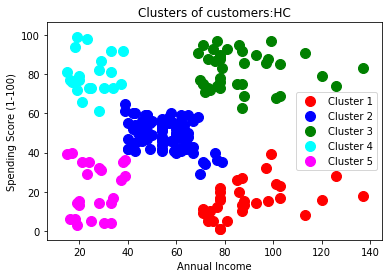

In [17]:
#visualising the clusters
plt.scatter(X[y_cluster == 0, 0], X[y_cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_cluster == 1, 0], X[y_cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_cluster == 2, 0], X[y_cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_cluster == 3, 0], X[y_cluster == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_cluster == 4, 0], X[y_cluster == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers:HC')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#cluster 3 is the most appropriate for targeting as they have the higest income and spend the most but the volume has to be comapred with the standard customers
#cluster 1 is the careful customers who have high income but are careful with their money
#cluster 2 is the standard customer
#cluster 4 are low income yet spending more and thus can be categorised as careless